In [1]:
import pandas
import matplotlib as mpl
import numpy as np

import seaborn as sea
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from math import sqrt
import statistics

In [2]:
patch = 'BankChurners.csv'
bank = pandas.read_csv(patch)
bank

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [3]:
#identify data types and values
numeric_data = ["CLIENTNUM","Customer_Age","Months_on_book",
                     "Credit_Limit","Total_Revolving_Bal",
                     "Avg_Open_To_Buy","Total_Amt_Chng_Q4_Q1","Total_Trans_Amt","Total_Trans_Ct","Total_Ct_Chng_Q4_Q1","Avg_Utilization_Ratio",
                     "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
                     "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"]
categorical_data = ["Attrition_Flag","Gender","Marital_Status"]
ordinal_data = ["Dependent_count","Education_Level","Income_Category","Card_Category","Total_Relationship_Count","Months_Inactive_12_mon","Contacts_Count_12_mon"]
print(bank[numeric_data].head())
print(bank[categorical_data].head())
print(bank[ordinal_data].head())

   CLIENTNUM  Customer_Age  Months_on_book  Credit_Limit  Total_Revolving_Bal  \
0  768805383            45              39       12691.0                  777   
1  818770008            49              44        8256.0                  864   
2  713982108            51              36        3418.0                    0   
3  769911858            40              34        3313.0                 2517   
4  709106358            40              21        4716.0                    0   

   Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0          11914.0                 1.335             1144              42   
1           7392.0                 1.541             1291              33   
2           3418.0                 2.594             1887              20   
3            796.0                 1.405             1171              20   
4           4716.0                 2.175              816              28   

   Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
0

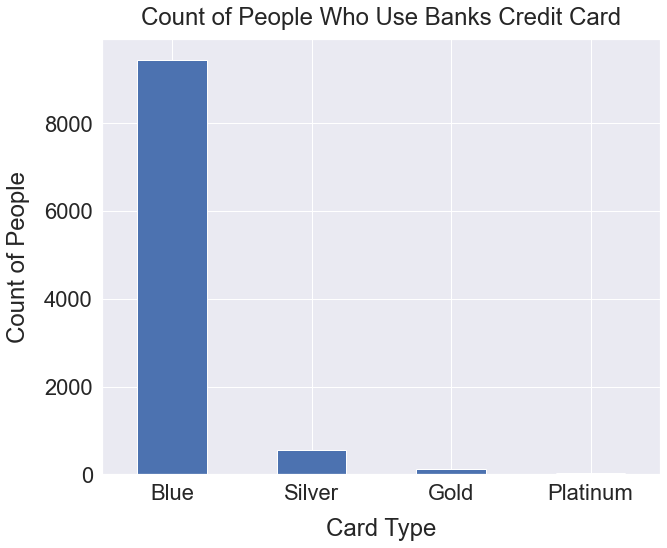

In [4]:
#data vizualizating Card type
sea.set(font_scale=2)
bank['Card_Category'].value_counts().plot(kind='bar', figsize=(10,8), rot=0)
plt.xlabel("Card Type", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("Count of People Who Use Banks Credit Card", y=1.02);

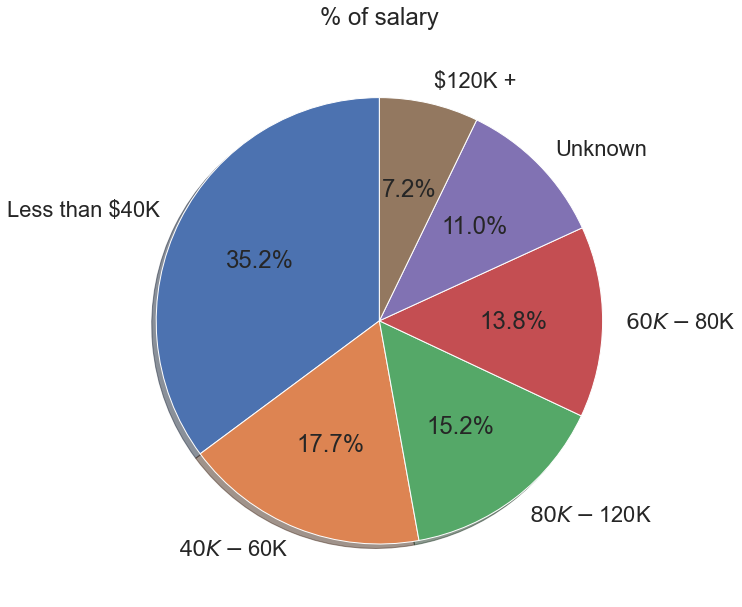

In [5]:
#Vizualization of salary
quantity = []
info = bank["Income_Category"].value_counts()
for i in range (0,len(info)):
    quantity.append(info[i])
plt.figure(figsize=(10, 11))
plt.pie(quantity, explode = None, labels = list(info.keys()), autopct = '%0.1f%%', shadow = True, startangle = 90)
plt.title("% of salary", y=1.02);
plt.show()

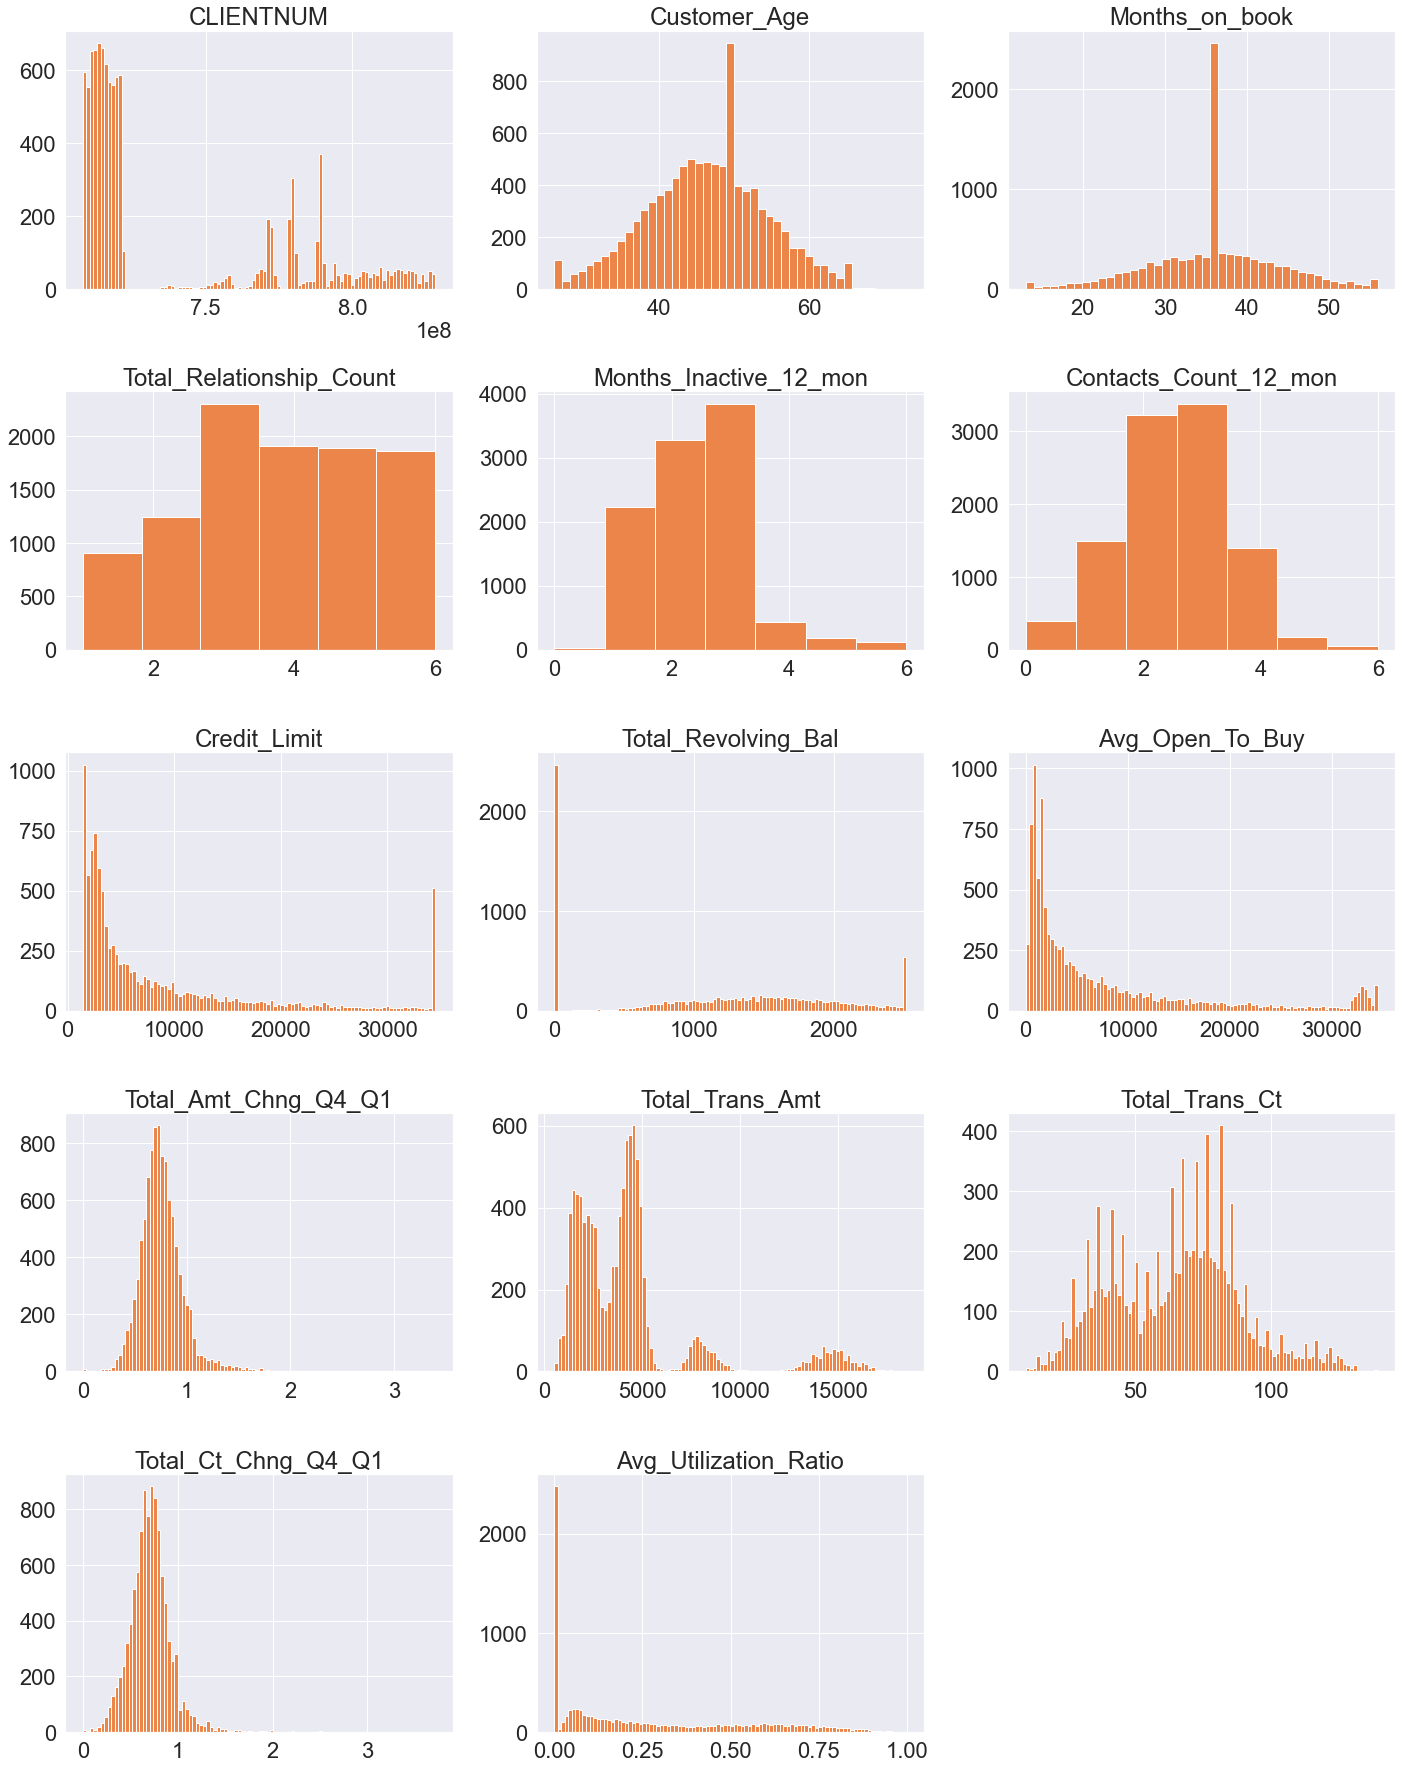

In [6]:
#Histograms:
headers = ["CLIENTNUM","Customer_Age","Months_on_book","Total_Relationship_Count",
           "Months_Inactive_12_mon","Contacts_Count_12_mon","Credit_Limit","Total_Revolving_Bal",
           "Avg_Open_To_Buy","Total_Amt_Chng_Q4_Q1","Total_Trans_Amt","Total_Trans_Ct","Total_Ct_Chng_Q4_Q1","Avg_Utilization_Ratio"]
    
fig = plt.figure(figsize=(10, 10))
for i in range(bank[headers].shape[1]):  
    plt.subplot(6, 3, i + 1) 
    f = plt.gca()
    f.set_title(bank[headers].columns.values[i])
    vals = np.size(bank[headers].iloc[:, i].unique())
    if vals >= 100:
        vals = 100 
    
    plt.hist(bank[headers].iloc[:, i], bins=vals, color = '#ec854a')
    plt.tight_layout(rect=[0, 0.03, 2, 3])

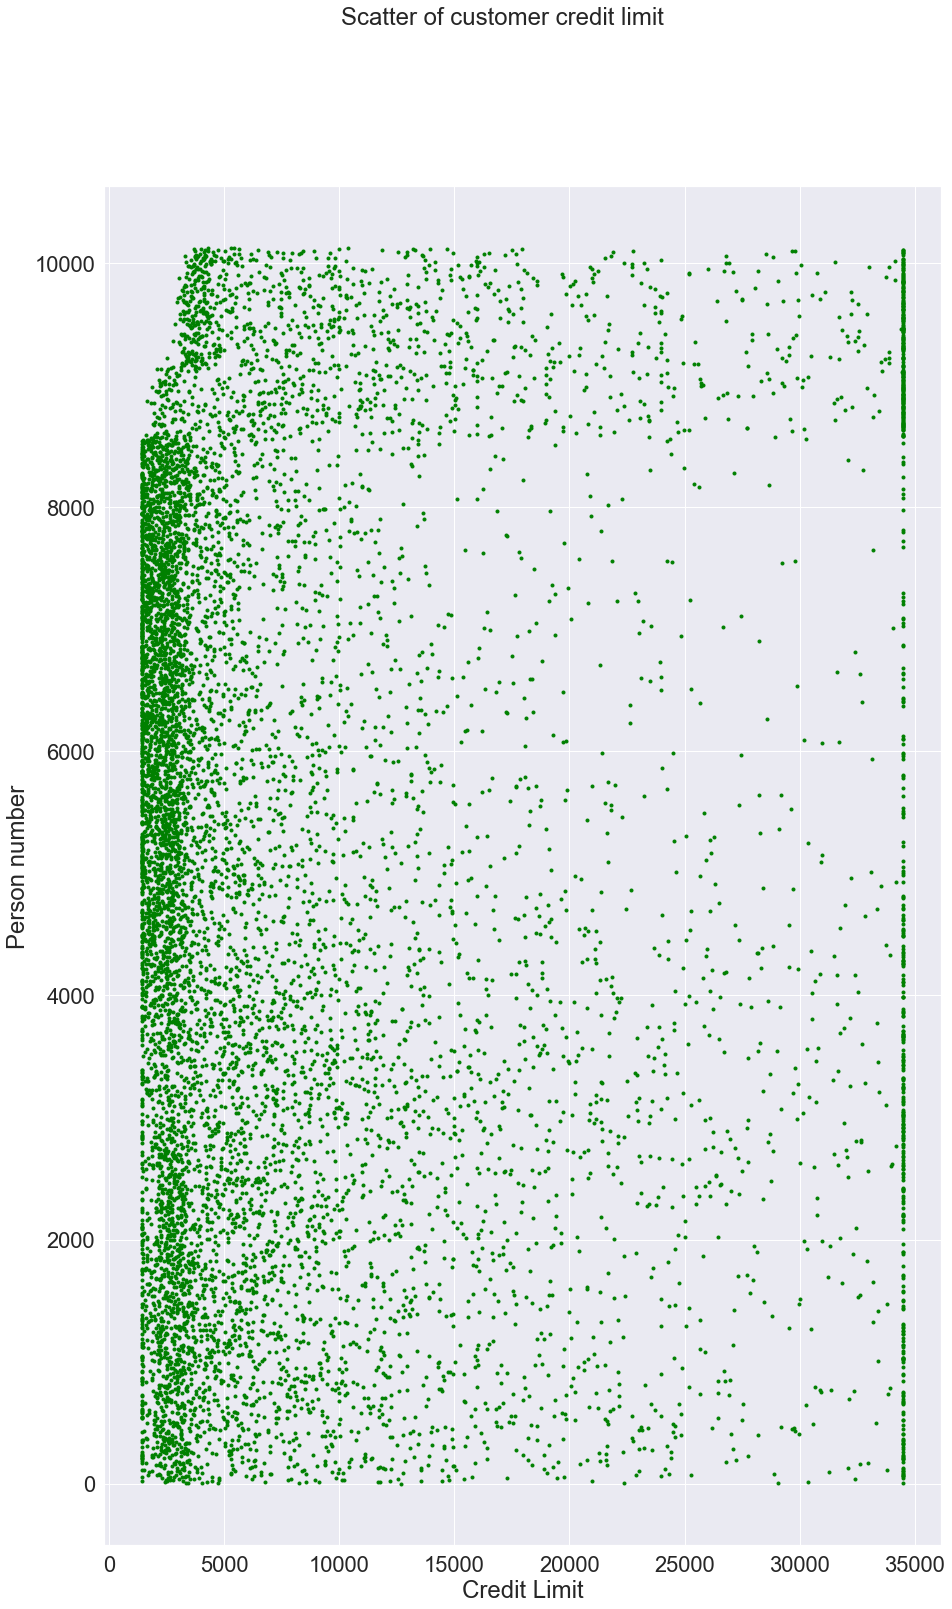

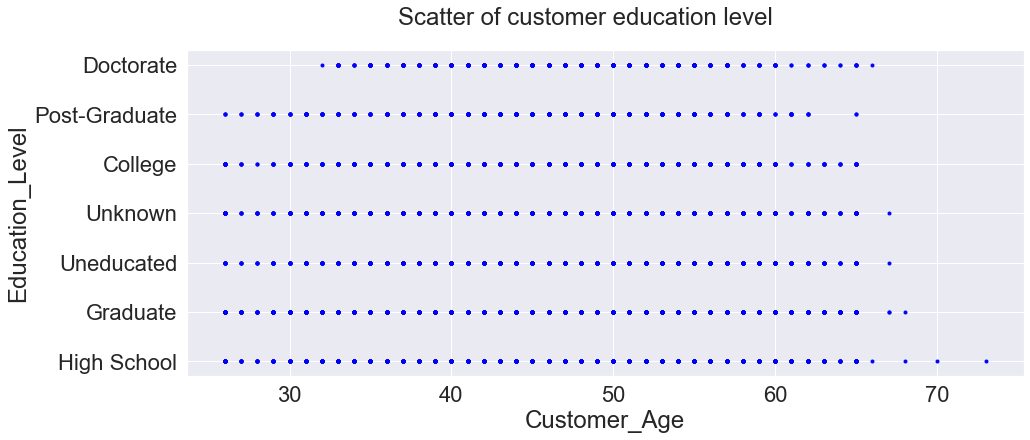

In [7]:
#subplots
fig, ax = plt.subplots(figsize=(15, 25))
plt.suptitle('Scatter of customer credit limit  \n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")
ax.scatter(x = bank['Credit_Limit'], y = range(len(bank)), marker = ".", color = "Green")
plt.xlabel("Credit Limit")
plt.ylabel("Person number")
plt.show()

fig, ax = plt.subplots(figsize=(15, 6))
plt.suptitle('Scatter of customer education level  \n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")
ax.scatter(x = bank['Customer_Age'], y = bank['Education_Level'], marker = ".", color = "Blue")
plt.xlabel("Customer_Age")
plt.ylabel("Education_Level")
plt.show()

<AxesSubplot:>

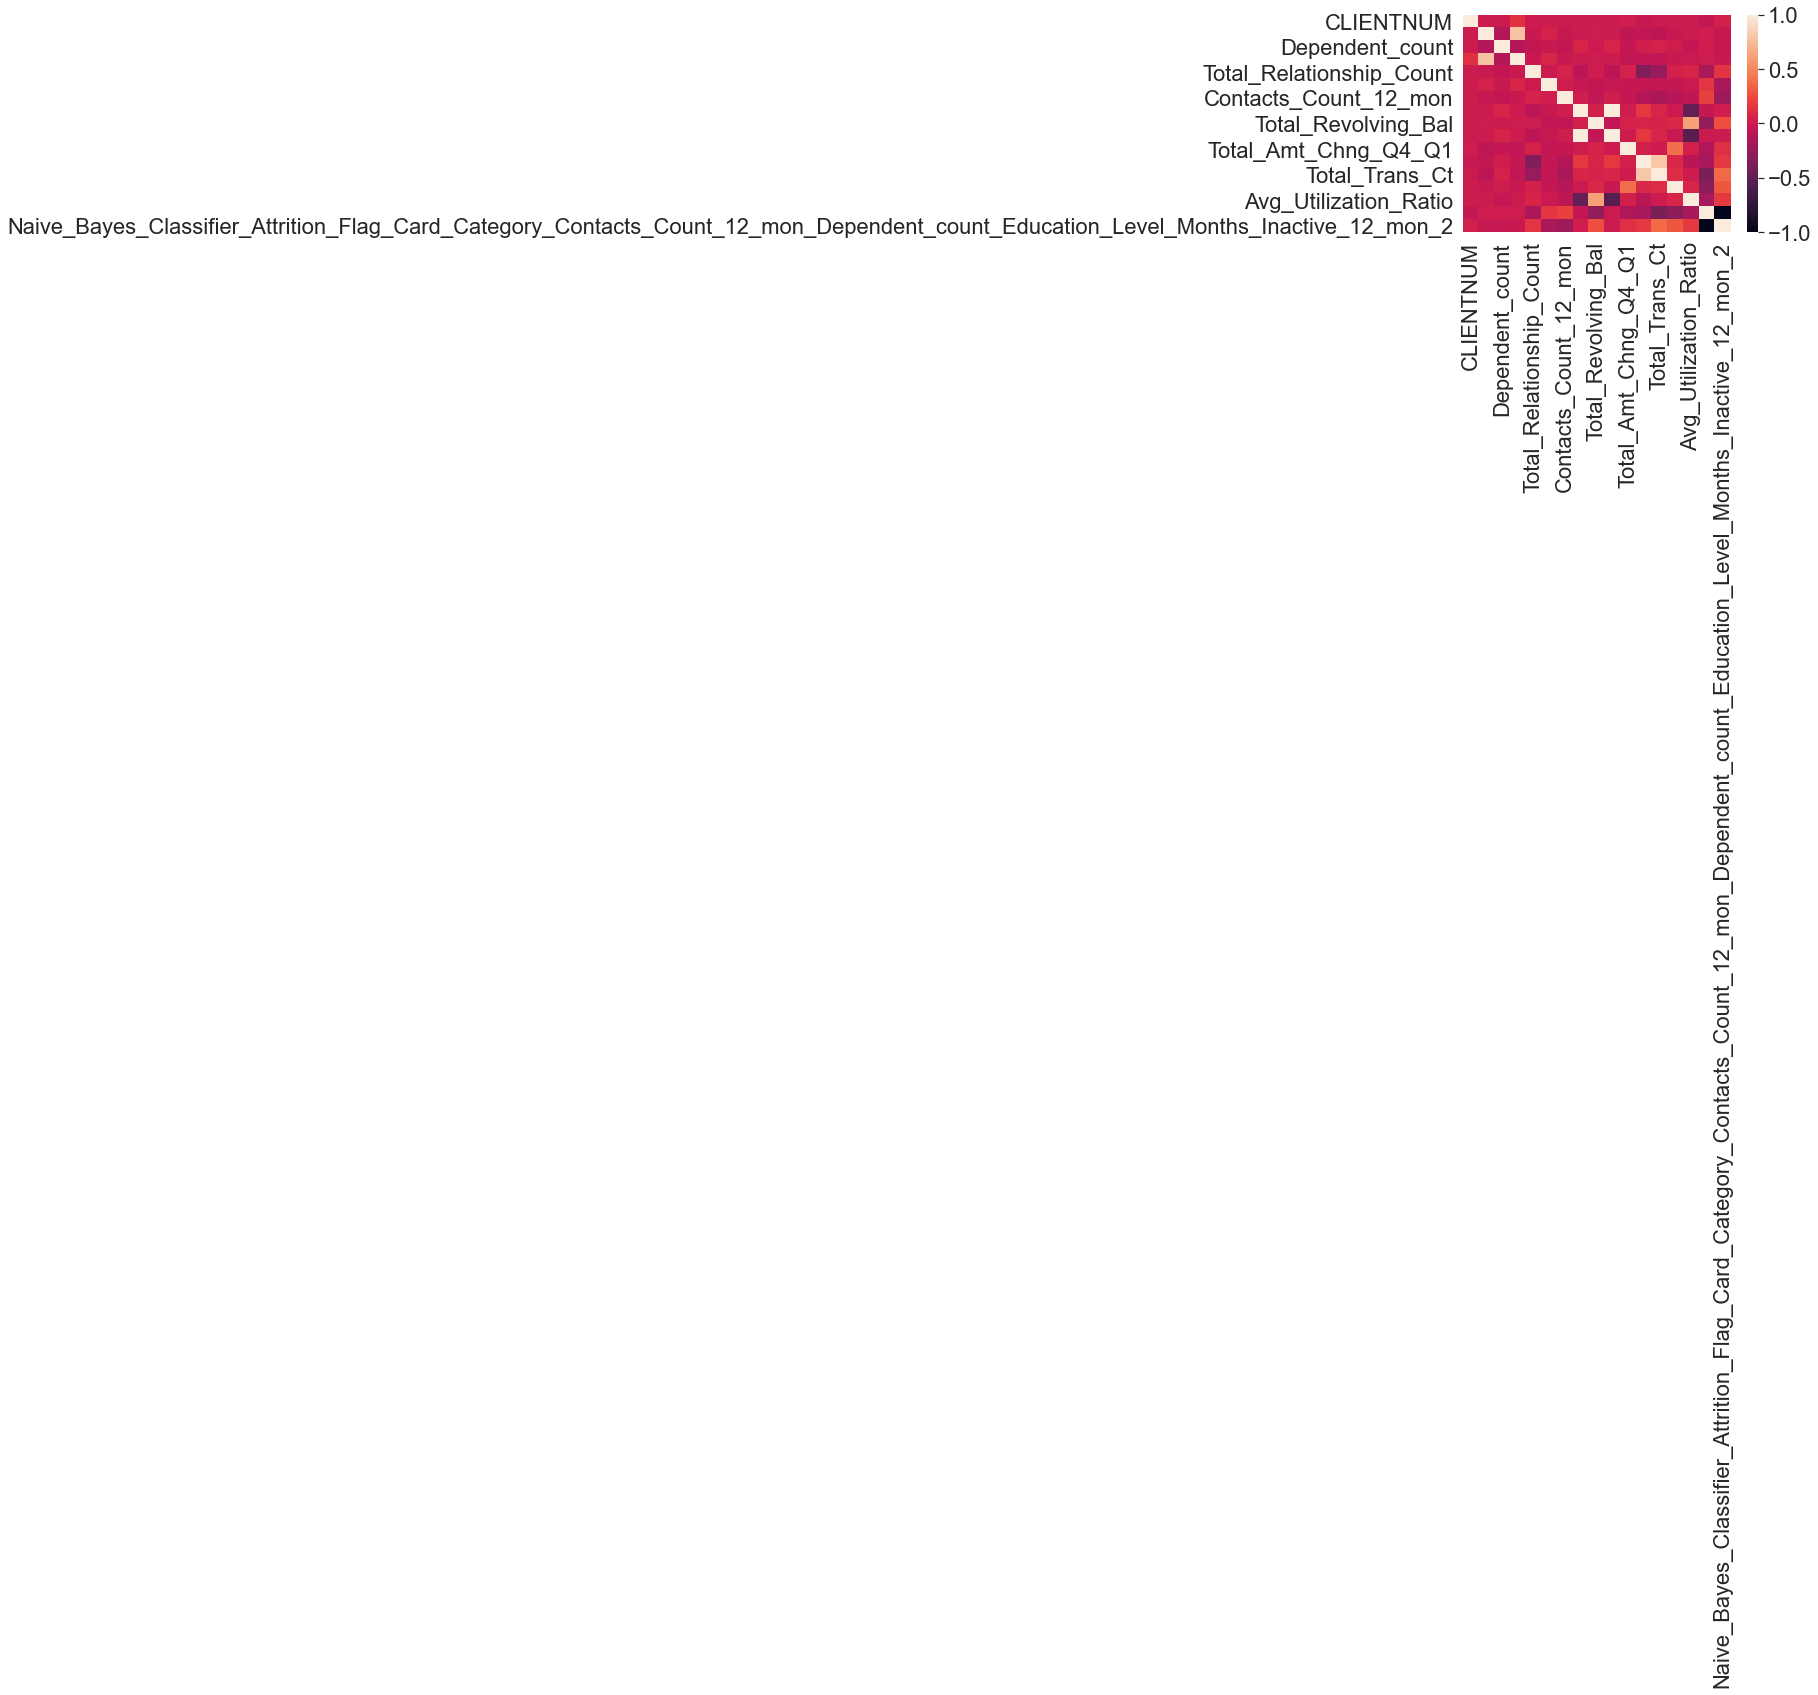

In [8]:
#map correlation
sea.heatmap(bank.corr())

In [9]:
#mean
mean_array = []
names = list(bank.columns)
for i in range(0,len(names)):
    try:
        var = bank[names[i]]
        ans = statistics.mean(var)
        mean_array.append(ans)
        print('Mean of {0} = {1}'.format(names[i],ans))
    except TypeError:
        continue
del mean_array[0], mean_array[6], mean_array[6], mean_array[6], mean_array[7]    

Mean of CLIENTNUM = 739177606.3336625
Mean of Customer_Age = 46.32596030413745
Mean of Dependent_count = 2.3462032191172115
Mean of Months_on_book = 35.928409203120374
Mean of Total_Relationship_Count = 3.8125802310654686
Mean of Months_Inactive_12_mon = 2.3411671768539546
Mean of Contacts_Count_12_mon = 2.4553174681544387
Mean of Credit_Limit = 8631.953698034957
Mean of Total_Revolving_Bal = 1162.8140614199665
Mean of Avg_Open_To_Buy = 7469.139636614989
Mean of Total_Amt_Chng_Q4_Q1 = 0.759940653698035
Mean of Total_Trans_Amt = 4404.086303939963
Mean of Total_Trans_Ct = 64.85869457884863
Mean of Total_Ct_Chng_Q4_Q1 = 0.7122223758269971
Mean of Avg_Utilization_Ratio = 0.2748935518909845
Mean of Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1 = 0.1599974639787795
Mean of Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2 = 0.84

In [10]:
#standard deviation 
try:
    for i in range(0,len(names)):
        nu = bank[names[i]]
        for i in range(len(nu)):
            summ_nu = sum(nu) 
            summ_sigma = 0
            nu_res = summ_nu/len(nu)
            summ_sigma += ((nu[i] - nu_res)*(nu[i] - nu_res))
            sigma = sqrt(summ_sigma/len(nu))
            print('Standard deviation of {0} = {1}'.format(names[i],sigma))
except TypeError and IndexError:
        next

Standard deviation of CLIENTNUM = 294414.1352659102
Standard deviation of Attrition_Flag = 790917.5357378745
Standard deviation of Customer_Age = 250370.1488653051
Standard deviation of Gender = 305409.2863360367
Standard deviation of Dependent_count = 298820.95690901956
Standard deviation of Education_Level = 259517.74489558584
Standard deviation of Marital_Status = 707219.3424362083
Standard deviation of Income_Category = 792270.9685544778
Standard deviation of Card_Category = 280694.1986681455
Standard deviation of Months_on_book = 193932.89475180983
Standard deviation of Total_Relationship_Count = 301956.3599153249
Standard deviation of Months_Inactive_12_mon = 281774.1128483538
Standard deviation of Contacts_Count_12_mon = 283981.6392816023
Standard deviation of Credit_Limit = 764208.8507992097
Standard deviation of Total_Revolving_Bal = 266122.4374180193
Standard deviation of Avg_Open_To_Buy = 241395.45834903972
Standard deviation of Total_Amt_Chng_Q4_Q1 = 290265.1150948088
Stand

In [12]:
#frequency
for i in range(len(names)):
    frequency = bank[names[i]].value_counts() 
    print(frequency)

709920258    1
717171408    1
709372608    1
796336833    1
721433283    1
            ..
720250158    1
709831983    1
720917808    1
719207733    1
708085458    1
Name: CLIENTNUM, Length: 10127, dtype: int64
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
44    500
49    495
46    490
45    486
47    479
43    473
48    472
50    452
42    426
51    398
53    387
41    379
52    376
40    361
39    333
54    307
38    303
55    279
56    262
37    260
57    223
36    221
35    184
58    157
59    157
34    146
33    127
60    127
32    106
65    101
61     93
62     93
31     91
26     78
30     70
63     65
29     56
64     43
27     32
28     29
67      4
68      2
66      2
70      1
73      1
Name: Customer_Age, dtype: int64
F    5358
M    4769
Name: Gender, dtype: int64
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64
Graduate         3128
High School      2013
Unknown          1519
Uneducated 

<ipython-input-13-c6959237a3b2>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


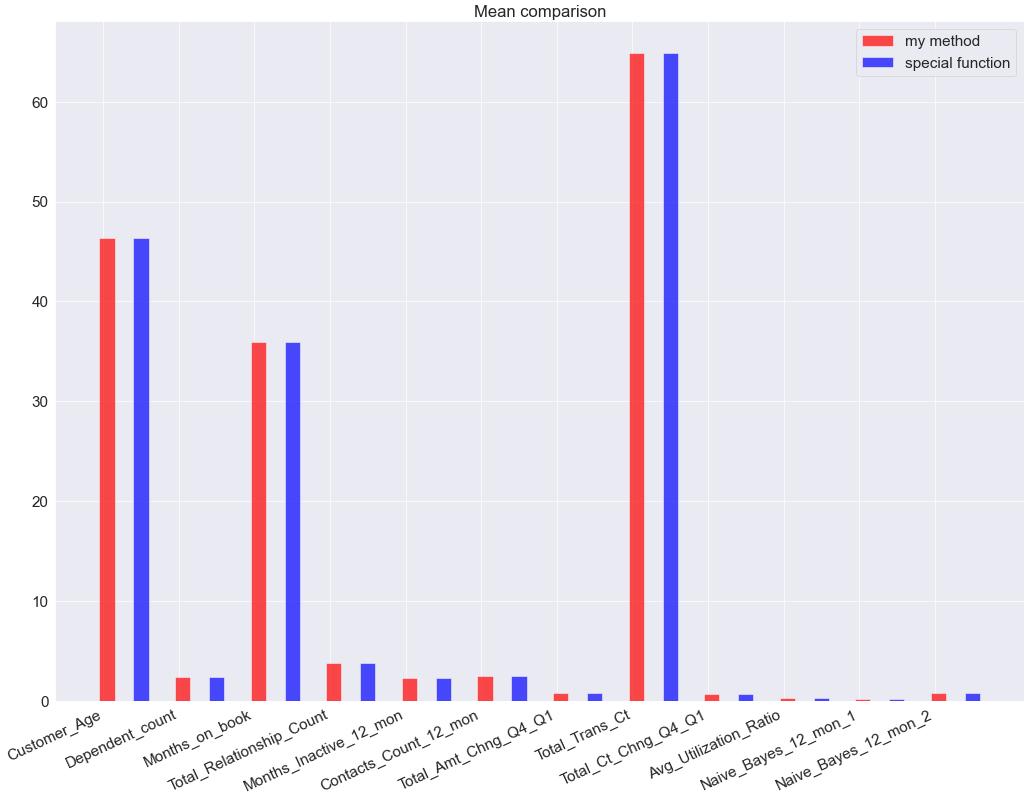

In [13]:
func_mean_array = []
mean = bank.mean()
for i in range(0,len(names)):
    try :
        func_mean_array.append(mean[i])
    except IndexError:
        next
del func_mean_array[0], func_mean_array[6], func_mean_array[6], func_mean_array[6], func_mean_array[7]   

data_names = ["Customer_Age","Dependent_count","Months_on_book","Total_Relationship_Count","Months_Inactive_12_mon","Contacts_Count_12_mon","Total_Amt_Chng_Q4_Q1","Total_Trans_Ct","Total_Ct_Chng_Q4_Q1","Avg_Utilization_Ratio","Naive_Bayes_12_mon_1","Naive_Bayes_12_mon_2"]
dpi = 50
fig = plt.figure(dpi = dpi, figsize = (25, 20) )
mpl.rcParams.update({'font.size': 10})

plt.title('Mean comparison')

ax = plt.axes()
ax.yaxis.grid(True, zorder = 1)

xs = range(len(data_names))

plt.bar([x + 0.05 for x in xs], [ d for d in mean_array],
        width = 0.2, color = 'red', alpha = 0.7, label = 'my method',
        zorder = 2)
plt.bar([x + 0.5 for x in xs], func_mean_array,
        width = 0.2, color = 'blue', alpha = 0.7, label = 'special function',
        zorder = 2)
plt.xticks(xs, data_names)

fig.autofmt_xdate(rotation = 25)

plt.legend(loc='upper right')